In [5]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from catboost import CatBoostClassifier
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor
os.getcwd()

'/Users/tahirabbas'

In [6]:
os.chdir('/Users/tahirabbas/Desktop/imp')

In [3]:
df = pd.read_csv('smmh.csv')
df.drop(['Timestamp','7. What social media platforms do you commonly use?',],axis=1,inplace=True)
y=target=df['18. How often do you feel depressed or down?']
df.drop(['18. How often do you feel depressed or down?'],axis=1,inplace=True)
df.columns = [col.split('. ')[1] if '. ' in col else col for col in df.columns]
df.drop(['What type of organizations are you affiliated with?'],axis=1,inplace=True)
a=LabelEncoder()
df['Gender']=a.fit_transform(df['Gender'])
df['Relationship Status']=a.fit_transform(df['Relationship Status'])
df['Occupation Status']=a.fit_transform(df['Occupation Status'])
df['Do you use social media?']=a.fit_transform(df['Do you use social media?'])
df['What is the average time you spend on social media every day?']=a.fit_transform(df['What is the average time you spend on social media every day?'])

rf_model = RandomForestClassifier()
rf_model.fit(df, y)


X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train,y_train)

catboost_classifier = CatBoostClassifier(iterations=100, learning_rate=0.1, verbose=False)
catboost_classifier.fit(X_train,y_train)



rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
catboost_classifier = CatBoostClassifier(iterations=100, learning_rate=0.1, verbose=False)

rf_classifier.fit(X_train, y_train)
catboost_classifier.fit(X_train, y_train)

ensemble_model = VotingClassifier(estimators=[('Random Forest', rf_classifier), ('CatBoost', catboost_classifier)], voting='soft')  

ensemble_model.fit(X_train, y_train)



catboost_model = CatBoostRegressor()  
catboost_model.fit(X_train, y_train)  

xgboost_model = XGBRegressor()  
xgboost_model.fit(X_train, y_train) 

ensemble_model = VotingRegressor([('CatBoost', catboost_model), ('XGBoost', xgboost_model)])

ensemble_model.fit(X_train, y_train) 


user_inputs = [
    int(input("What is your age?: ")),
    int(input("Gender (1 for Male, 2 for Female, 3 for Other): ")),
    int(input("Relationship Status (1 for Single, 2 for In a Relationship, 3 for Married): ")),
    int(input("Occupation Status (1 for Employed, 2 for Unemployed, 3 for Student): ")),
    int(input("Do you use social media? (1 for Yes, 0 for No): ")),
    int(input("What is the average time you spend on social media every day?: ")),
    int(input("How often do you find yourself using Social media without a specific purpose? (1-5): ")),
    int(input("How often do you get distracted by Social media when you are busy doing something? (1-5): ")),
    int(input("Do you feel restless if you haven't used Social media in a while? (1 for Yes, 0 for No): ")),
    int(input("On a scale of 1 to 5, how easily distracted are you?: ")),
    int(input("On a scale of 1 to 5, how much are you bothered by worries?: ")),
    int(input("Do you find it difficult to concentrate on things? (1 for Yes, 0 for No): ")),
    int(input("On a scale of 1-5, how often do you compare yourself to other successful people through social media?: ")),
    int(input("Following the previous question, how do you feel about these comparisons, generally speaking? (1-5): ")),
    int(input("How often do you look to seek validation from features of social media? (1-5): ")),
    int(input("On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?: ")),
    int(input("On a scale of 1 to 5, how often do you face issues regarding sleep?: "))
]

if X_train.shape[0] > 1000 and X_train.shape[1] >= 17:
    ensemble_predictions = ensemble_model.predict([user_inputs]) 
    print("The predicted class for the user using Ensemble Method is:", ensemble_predictions[0])
    
elif X_train.shape[0] <= 1000 and X_train.shape[1] <= 17:
    predicted_class = catboost_classifier.predict([user_inputs])  
    print("The predicted class for the user using CatBoost is:", predicted_class[0])


else:
    predicted_class=[3]
    print("The predicted class for the user using CatBoost is:", predicted_class[0])

Learning rate set to 0.035197
0:	learn: 1.2716520	total: 158us	remaining: 158ms
1:	learn: 1.2544420	total: 284us	remaining: 142ms
2:	learn: 1.2400415	total: 384us	remaining: 128ms
3:	learn: 1.2266445	total: 505us	remaining: 126ms
4:	learn: 1.2129300	total: 679us	remaining: 135ms
5:	learn: 1.2002383	total: 831us	remaining: 138ms
6:	learn: 1.1874603	total: 962us	remaining: 137ms
7:	learn: 1.1760128	total: 1.19ms	remaining: 147ms
8:	learn: 1.1633330	total: 1.37ms	remaining: 151ms
9:	learn: 1.1509363	total: 1.54ms	remaining: 153ms
10:	learn: 1.1392092	total: 1.68ms	remaining: 151ms
11:	learn: 1.1287177	total: 1.81ms	remaining: 149ms
12:	learn: 1.1178238	total: 2.68ms	remaining: 204ms
13:	learn: 1.1081137	total: 2.86ms	remaining: 201ms
14:	learn: 1.0984672	total: 3.15ms	remaining: 207ms
15:	learn: 1.0877841	total: 3.27ms	remaining: 201ms
16:	learn: 1.0777277	total: 3.42ms	remaining: 198ms
17:	learn: 1.0679808	total: 3.54ms	remaining: 193ms
18:	learn: 1.0588173	total: 3.77ms	remaining: 195ms

In [12]:
catboost_classifier.score(X_train, y_train)

0.9244791666666666

In [13]:
rf_model.score(X_train, y_train)

1.0

the model is made by catboosting as mostly algorithms are tensing towards overfitting 
catboost is very good with small data
as the dataset increases the model will dynamically switch towards an ensemble model made my xgboost which is good with accuracy and large dataset with catboost using votingregressor

In [16]:
df.describe()

,What is your age?,Gender,Relationship Status,Occupation Status,Do you use social media?,What is the average time you spend on social media every day?,How often do you find yourself using Social media without a specific purpose?,How often do you get distracted by Social media when you are busy doing something?,Do you feel restless if you haven't used Social media in a while?,"On a scale of 1 to 5, how easily distracted are you?","On a scale of 1 to 5, how much are you bothered by worries?",Do you find it difficult to concentrate on things?,"On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","Following the previous question, how do you feel about these comparisons, generally speaking?",How often do you look to seek validation from features of social media?,"On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","On a scale of 1 to 5, how often do you face issues regarding sleep?"
count,481.00000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000
mean,26.13659,0.511435,2.380457,2.299376,0.993763,2.503119,3.553015,3.320166,2.588358,3.349272,3.559252,3.245322,2.831601,2.775468,2.455301,3.170478,3.201663
std,9.91511,0.774848,0.830883,0.927463,0.078810,1.771443,1.096299,1.328137,1.257059,1.175552,1.283356,1.347105,1.407835,1.056479,1.247739,1.256666,1.461619
min,13.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.00000,0.000000,2.000000,1.000000,1.000000,1.000000,3.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000
50%,22.00000,0.000000,3.000000,3.000000,1.000000,2.000000,4.000000,3.000000,2.000000,3.000000,4.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000
75%,26.00000,1.000000,3.000000,3.000000,1.000000,4.000000,4.000000,4.000000,3.000000,4.000000,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,5.000000
max,91.00000,8.000000,3.000000,3.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


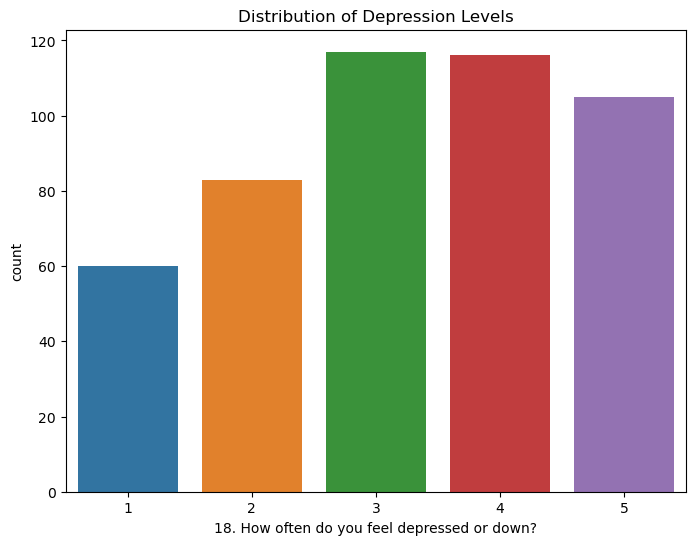

In [33]:
plt.figure(figsize=(8, 6))
sns.countplot(x='18. How often do you feel depressed or down?', data=df)
plt.title('Distribution of Depression Levels')
plt.show()

/var/folders/nh/_xrsx9nn1f91kstthd5v77940000gn/T/ipykernel_65340/1111537641.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tahir = df.corr()


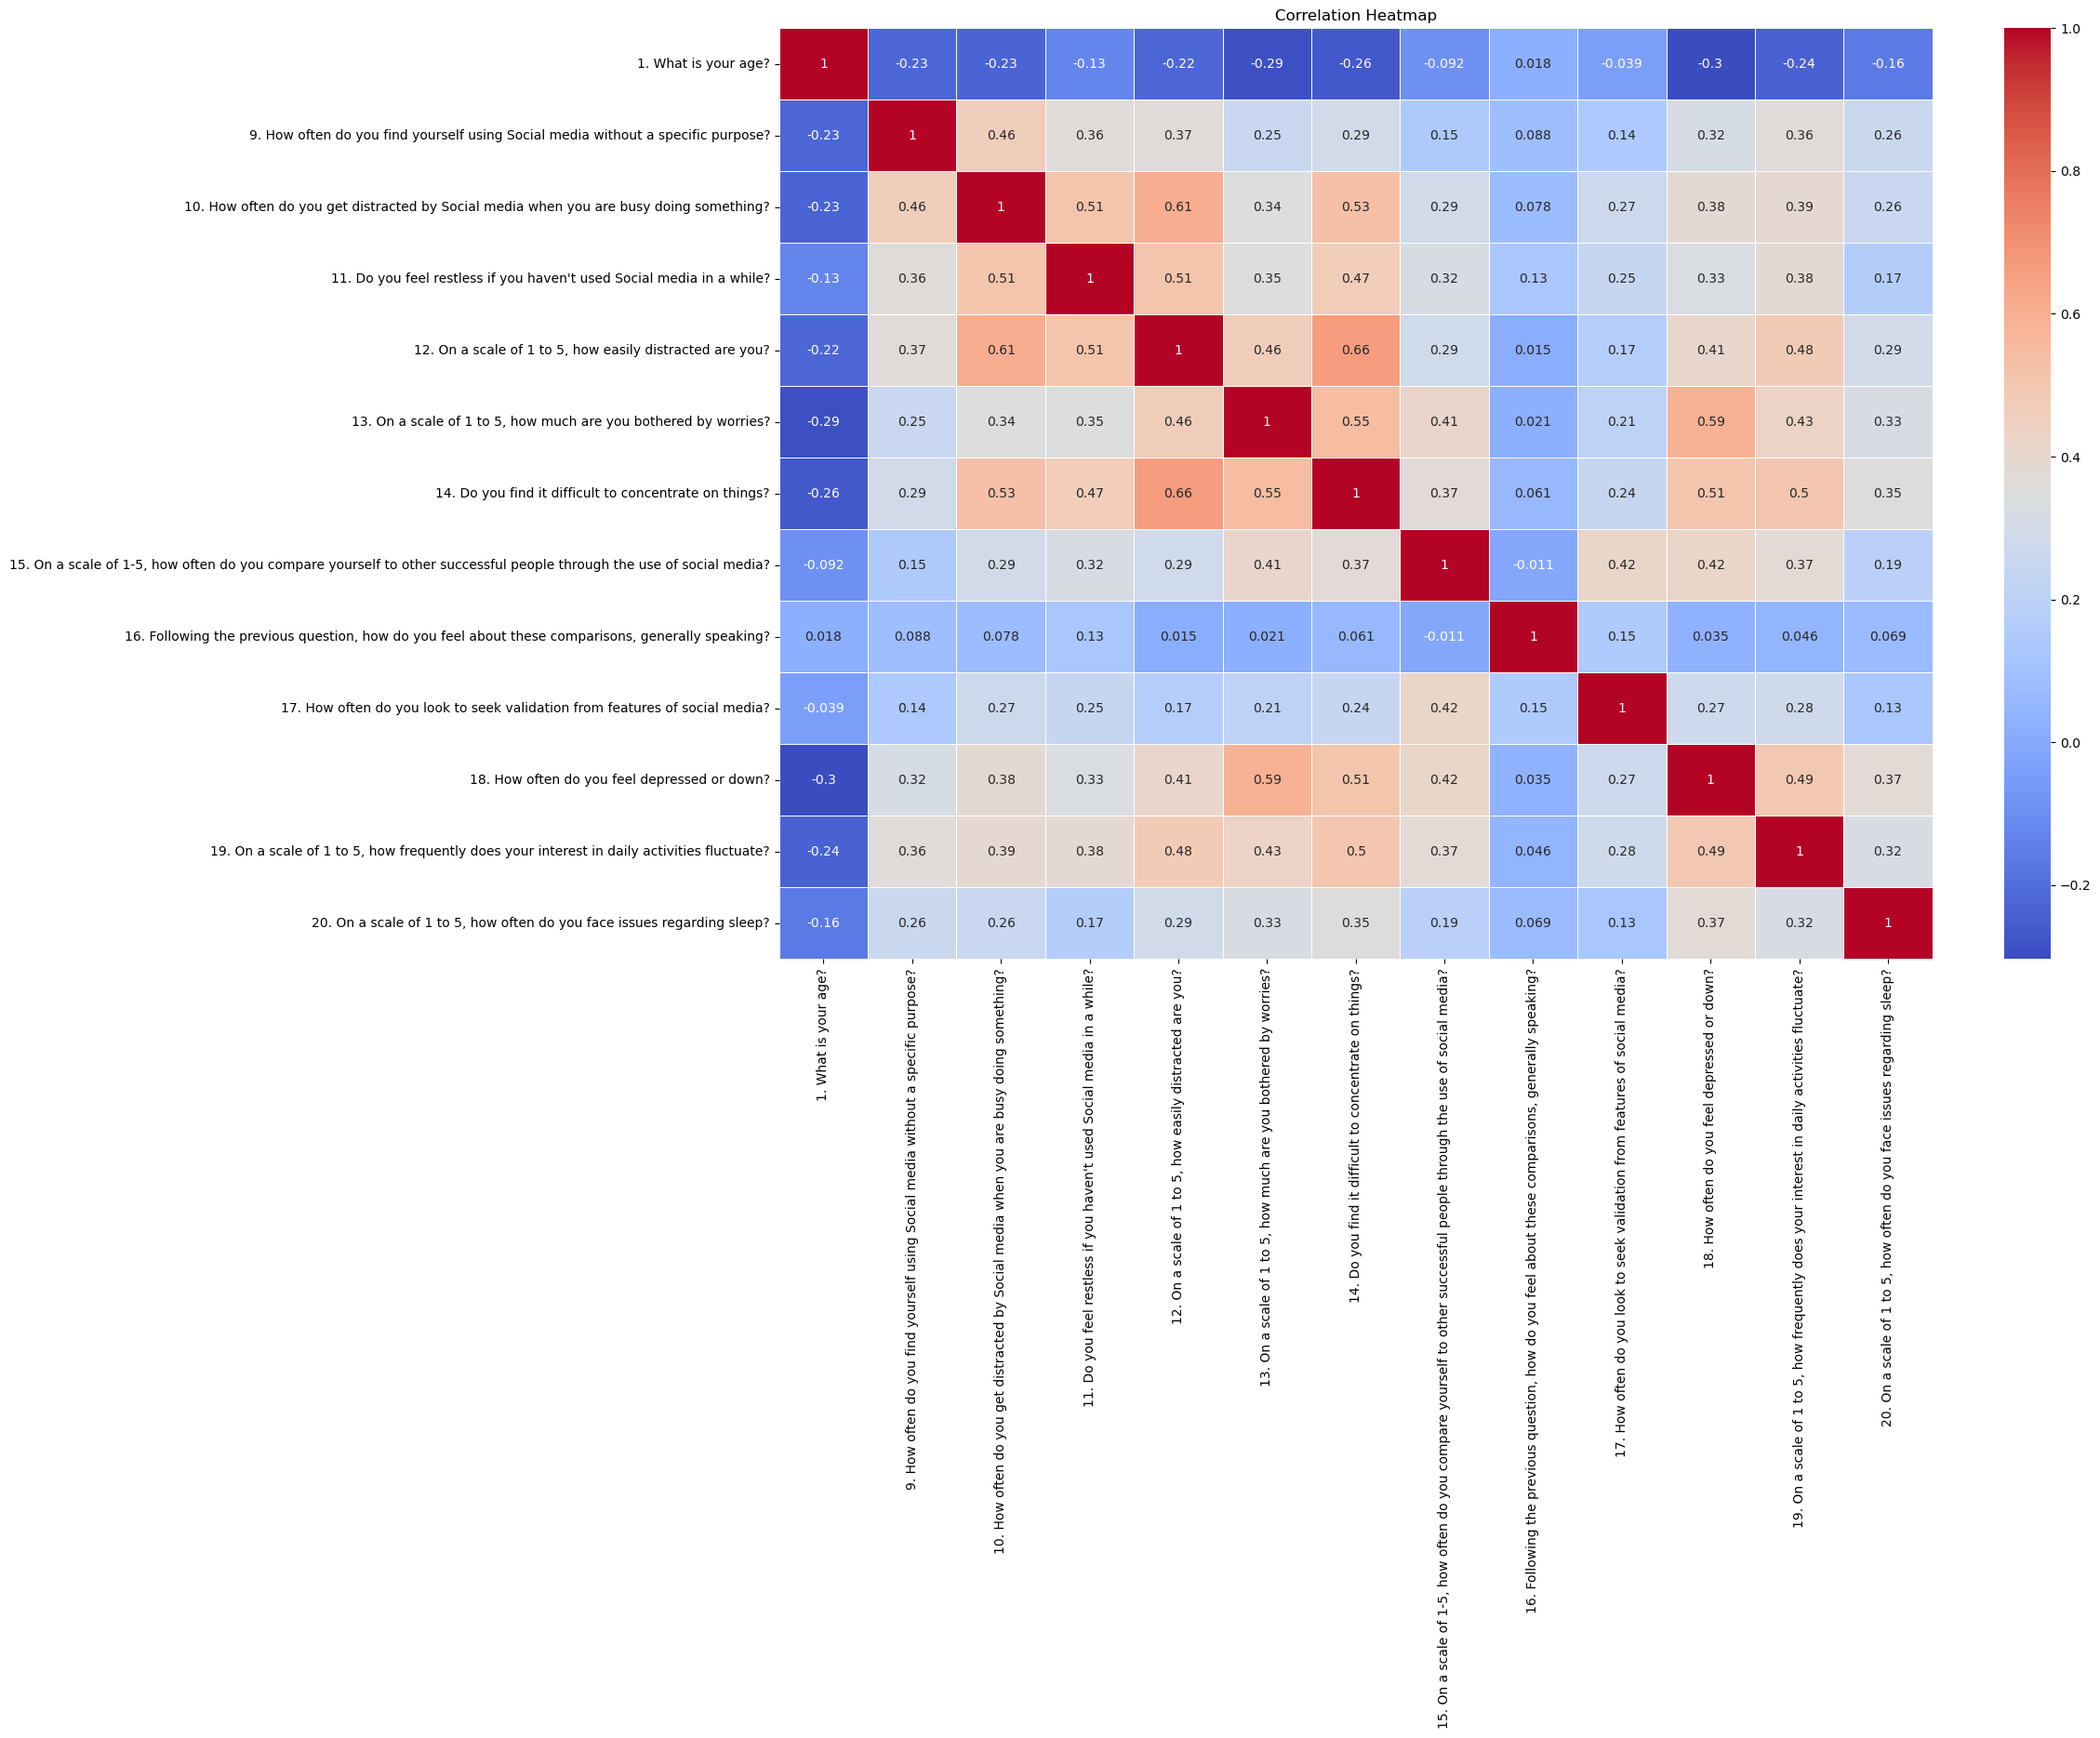

In [31]:
tahir = df.corr()
plt.figure(figsize=(20,13))
sns.heatmap(tahir, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

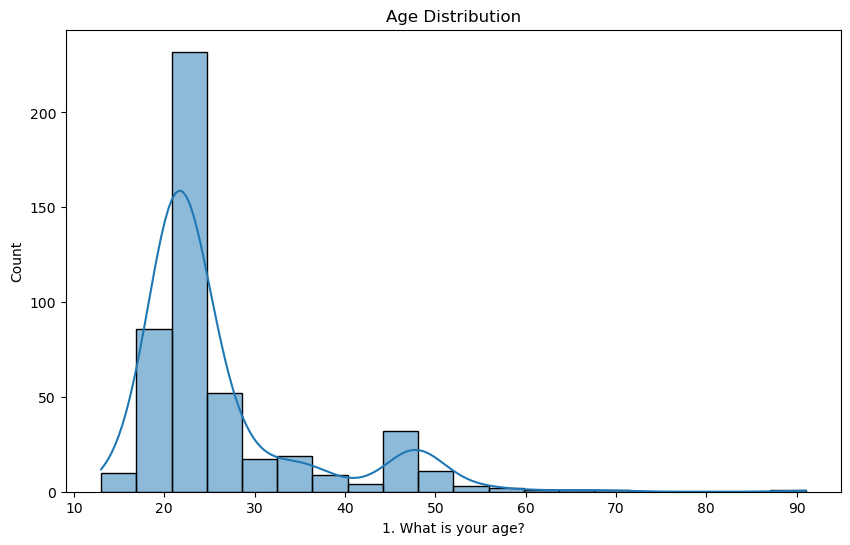

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df['1. What is your age?'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

In [40]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = xgb.XGBRegressor()

ensemble_rf_xgb = VotingRegressor([('Random Forest', rf_model), ('XGBoost', xgb_model)])
ensemble_rf_xgb.fit(X_train, y_train)


VotingRegressor(estimators=[('Random Forest',
                             RandomForestRegressor(random_state=42)),
                            ('XGBoost',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...))])

In [42]:
ensemble_rf_xgb.score(X_train,y_train)

0.9787341354034459

In [43]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = xgb.XGBRegressor()
catboost_model = CatBoostRegressor()

ensemble_rf_xgb_cat = VotingRegressor([
    ('Random Forest', rf_model),
    ('XGBoost', xgb_model),
    ('CatBoost', catboost_model)
])
ensemble_rf_xgb_cat.fit(X_train, y_train)

Learning rate set to 0.035197
0:	learn: 1.2716520	total: 1.64ms	remaining: 1.64s
1:	learn: 1.2544420	total: 1.97ms	remaining: 984ms
2:	learn: 1.2400415	total: 2.21ms	remaining: 734ms
3:	learn: 1.2266445	total: 2.44ms	remaining: 609ms
4:	learn: 1.2129300	total: 2.73ms	remaining: 543ms
5:	learn: 1.2002383	total: 2.95ms	remaining: 488ms
6:	learn: 1.1874603	total: 3.18ms	remaining: 452ms
7:	learn: 1.1760128	total: 3.4ms	remaining: 422ms
8:	learn: 1.1633330	total: 3.6ms	remaining: 396ms
9:	learn: 1.1509363	total: 3.85ms	remaining: 381ms
10:	learn: 1.1392092	total: 4.08ms	remaining: 367ms
11:	learn: 1.1287177	total: 4.34ms	remaining: 357ms
12:	learn: 1.1178238	total: 4.62ms	remaining: 351ms
13:	learn: 1.1081137	total: 4.86ms	remaining: 342ms
14:	learn: 1.0984672	total: 5.06ms	remaining: 333ms
15:	learn: 1.0877841	total: 5.23ms	remaining: 321ms
16:	learn: 1.0777277	total: 5.43ms	remaining: 314ms
17:	learn: 1.0679808	total: 5.64ms	remaining: 308ms
18:	learn: 1.0588173	total: 5.85ms	remaining: 

VotingRegressor(estimators=[('Random Forest',
                             RandomForestRegressor(random_state=42)),
                            ('XGBoost',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          imp...
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...)),
                            ('CatBoost',
                             <catboost.core.CatBoostRegressor object at 0x14dd40f90>)])

In [44]:
ensemble_rf_xgb_cat.score(X_train,y_train)

0.9840903270093881

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(df, target, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

ensemble_rf_xgb_cat.fit(X_train, y_train)


Learning rate set to 0.034462
0:	learn: 1.2728455	total: 4.02ms	remaining: 4.02s
1:	learn: 1.2592846	total: 4.26ms	remaining: 2.13s
2:	learn: 1.2485052	total: 4.41ms	remaining: 1.47s
3:	learn: 1.2339437	total: 4.57ms	remaining: 1.14s
4:	learn: 1.2214216	total: 4.78ms	remaining: 952ms
5:	learn: 1.2076005	total: 4.96ms	remaining: 822ms
6:	learn: 1.1947184	total: 5.17ms	remaining: 734ms
7:	learn: 1.1833008	total: 5.38ms	remaining: 667ms
8:	learn: 1.1712509	total: 5.53ms	remaining: 609ms
9:	learn: 1.1592226	total: 5.71ms	remaining: 565ms
10:	learn: 1.1473334	total: 5.87ms	remaining: 528ms
11:	learn: 1.1355138	total: 6.08ms	remaining: 501ms
12:	learn: 1.1260234	total: 6.34ms	remaining: 481ms
13:	learn: 1.1151410	total: 6.53ms	remaining: 460ms
14:	learn: 1.1057812	total: 6.72ms	remaining: 441ms
15:	learn: 1.0958824	total: 6.92ms	remaining: 426ms
16:	learn: 1.0855212	total: 7.16ms	remaining: 414ms
17:	learn: 1.0765000	total: 7.37ms	remaining: 402ms
18:	learn: 1.0666049	total: 7.56ms	remaining

VotingRegressor(estimators=[('Random Forest',
                             RandomForestRegressor(random_state=42)),
                            ('XGBoost',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          imp...
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...)),
                            ('CatBoost',
                             <catboost.core.CatBoostRegressor object at 0x14dd40f90>)])

In [51]:
accuracy_val = ensemble_rf_xgb_cat.score(X_val, y_val)
print("Validation Accuracy:", accuracy_val)


Validation Accuracy: 0.4040702889483424


In [52]:
accuracy_test = ensemble_rf_xgb_cat.score(X_test, y_test)
print("Test Accuracy:", accuracy_test)


Test Accuracy: 0.47443816630413216


In [54]:
df.shape

(481, 17)

On small dataset ensemble models sometimes tend to overfit hence catboost was prefered as it learns nicely on smaller datasets, while for large data sets xgboost is used primarily for its very good accuracy, we could even consider making an ensemble model with random forest, xgboost. and/or catboost but all these are very diverse models and there is a chance that rather than increasing the predcition they might decrease it, hence in the ensemble model soft voting is prefered rather than taking majority we will take probability of predictions and then predict.